<a href="https://colab.research.google.com/github/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Lectures/Lecture5_orientation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
# make 3 x 3 numpy matrix
rot_45_x = np.array([[1, 0, 0],
                     [0, np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45))],
                     [0, np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45))]])
rot_30_y = np.array([[np.cos(np.deg2rad(30)), 0, np.sin(np.deg2rad(30))],
                     [0, 1, 0],
                     [-np.sin(np.deg2rad(30)), 0, np.cos(np.deg2rad(30))]])


In [3]:
print(rot_45_x)
print(rot_30_y)

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
[[ 0.8660254  0.         0.5      ]
 [ 0.         1.         0.       ]
 [-0.5        0.         0.8660254]]


In [4]:
rot_mtx = rot_45_x @ rot_30_y
print(rot_mtx)

[[ 0.8660254   0.          0.5       ]
 [ 0.35355339  0.70710678 -0.61237244]
 [-0.35355339  0.70710678  0.61237244]]


In [5]:
np.trace(rot_mtx)
theta = np.arccos((np.trace(rot_mtx) - 1)/2)
print(theta)

0.9363243808091234


In [6]:
w_skew = 1/(2*np.sin(theta))*(rot_mtx- rot_mtx.transpose())
print(w_skew)
w = np.array([w_skew[2,1], w_skew[0,2], w_skew[1,0]])
print(w)

[[ 0.         -0.21949345  0.52990408]
 [ 0.21949345  0.         -0.81916073]
 [-0.52990408  0.81916073  0.        ]]
[0.81916073 0.52990408 0.21949345]


In [10]:
def draw_vector(ax, origin, end, **kwargs):
  ax.quiver(*origin, *(end-origin), **kwargs)

def draw_axes_mp(Rs, **kwargs):
  """
  Rs: a list of rotation matrices
  """
  fig= plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  origin = np.zeros(3)

  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  draw_vector(ax, origin, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
  draw_vector(ax, origin, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
  draw_vector(ax, origin, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r', label='x')
  y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g', label='y')
  z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b', label='z')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):
    # complete this function that updates x_, y_, and z_axis with the values in Rs
    x_e = Rs[k][:, 0]
    y_e = Rs[k][:, 1]
    z_e = Rs[k][:, 2]
    x_axis.set_data([0, x_e[0]], [0, x_e[1]])
    x_axis.set_3d_properties([0, x_e[2]])
    y_axis.set_data([0, y_e[0]], [0, y_e[1]])
    y_axis.set_3d_properties([0, y_e[2]])
    z_axis.set_data([0, z_e[0]], [0, z_e[1]])
    z_axis.set_3d_properties([0, z_e[2]])

    return x_axis, y_axis, z_axis,

  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=1000, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=1000, blit=True)
  return anim

In [35]:
# Help function: 3-dim vector to skew symmetry matrix
def hat(a):
  return np.array([[0, -a[2], a[1]],
                   [a[2], 0, -a[0]],
                   [-a[1], a[0], 0]])

N_t = 15
R = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])


R_list = np.zeros((N_t, 3, 3))
R_list[0, :, :] = R
omega_t = w*theta/(N_t-1)

for i in range(N_t-1):
  omega_t_hat = hat(omega_t)
  exp_omega_t = scipy.linalg.expm(omega_t_hat)

  R_list[i+1, :, :] = exp_omega_t@R_list[i,:,:]

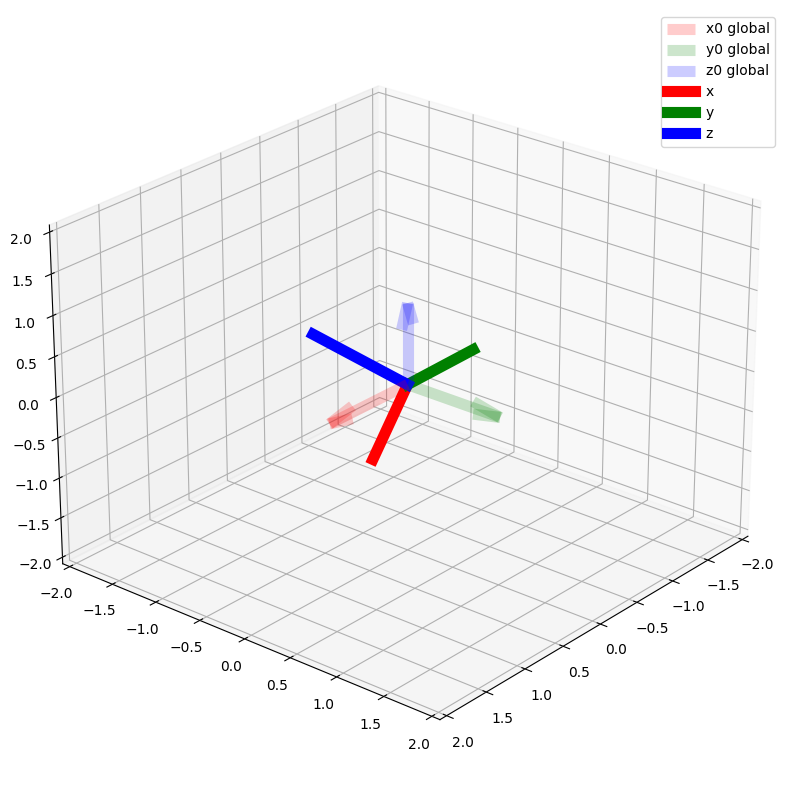

In [36]:
anim = draw_axes_mp(R_list, frames = N_t)
HTML(anim.to_html5_video())

In [37]:
Ra = np.array([[0,1,0],
               [-1, 0, 0],
               [0, 0, 1]])
Rb = np.array([[1,0,0],
               [0, np.sqrt(3)/2, -1/2],
               [0, 1/2, np.sqrt(3)/2]])
print(Ra)
print(Rb)


[[ 0  1  0]
 [-1  0  0]
 [ 0  0  1]]
[[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.5      ]
 [ 0.         0.5        0.8660254]]


In [38]:
imp_err = np.linalg.inv(Ra)@Rb
exp_err = Rb@np.linalg.inv(Ra)
print(exp_err)
print(imp_err)

[[ 0.        -1.         0.       ]
 [ 0.8660254  0.        -0.5      ]
 [ 0.5        0.         0.8660254]]
[[ 0.        -0.8660254  0.5      ]
 [ 1.         0.         0.       ]
 [ 0.         0.5        0.8660254]]


In [39]:
np.trace(imp_err)
theta_imp = np.arccos((np.trace(imp_err) - 1)/2)
np.trace(exp_err)
theta_exp = np.arccos((np.trace(exp_err) - 1)/2)
print(theta_exp)
print(theta_imp)

1.6378338249998232
1.6378338249998232
